In [1]:
# run python scripts containing all the functions
%run -i '0_paths_open_save.py'
%run -i '1_scraping_cleaning_merge.py'
%run -i '2_summary_stats_visualization_new.py'

# 1. check scraped data

In [ ]:
initial_panel = '201812'
tracking_panels = ['201812', '201912', '202001', '202003', '202004', '202009', '202010',
          '202011', '202012', '202101', '202102']

o = open_files(initial_panel=initial_panel, all_panels=tracking_panels)
app_details = o.open_initial_panel_with_its_tracking_panels()
A = app_detail_dicts(app_details, all_panels=tracking_panels)
A.get_a_glimpse()

# 2. check converted data

In [ ]:
# test
%run -i '1_scraping_cleaning_merge.py'
initial_panel='201907'
all_panels=['201907', '201908', '201909', '201912', '202001', '202003', '202004',
          '202009', '202010', '202011', '202012', '202101', '202102']
o = open_files(initial_panel=initial_panel,
                   all_panels=all_panels)
app_details = o.open_initial_panel_with_its_tracking_panels()
A = app_detail_dicts(d=app_details, all_panels=all_panels)
inter_df = A.format_cols()
print(inter_df['201907'].columns)


# 3. check whether the developer geocoding information is correct.

In [76]:
%run -i '0_paths_open_save.py'
%run -i '1_scraping_cleaning_merge.py'
%run -i '2_summary_stats_visualization_new.py'
initial_panel='201907'
o = open_files(initial_panel=initial_panel)
DF = o.open_panel_df(type='dev_index_geocoded')
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102']
consec_panels = ['202009', '202010', '202011', '202012', '202101', '202102']
new_class_obj = pre_processing(
                  df=DF,
                  df_index = 'dev_index_geocoded',
                  initial_panel=initial_panel,
                  all_panels=all_panels,
                  consec_panels=consec_panels)
print(new_class_obj.df.shape)
DF2 = new_class_obj.df[['developerAddress_201907', 'location', 'longitude', 'latitude']]
testdf1 = DF2.sample(100)
testdf1

(6442, 55)


,developerAddress_201907,location,longitude,latitude
developer,,,,
My Apps Studio,None,None,NaN,NaN
Pintogykas,None,None,NaN,NaN
International Dairy Queen®️,"8331 Norman Center Drive\nBloomington, MN 55437","(8331 Norman Center Drive, Minneapolis, MN 55437, (44.85294, -93.35164))",-93.35164,44.85294
"SNOW, Inc.","575 High Street,Suite 110 Palo Alto, CA 94301","(575 High Street, Palo Alto, CA 94301, (37.44357, -122.16224))",-122.16224,37.44357
Saucon IoT,None,None,NaN,NaN
...,...,...,...,...
Straight Talk,None,None,NaN,NaN
Maadinfo Services,2 allée des Ormeaux\n06130 Grasse\nFrance,"(2 Allée des Ormeaux, Grasse, 06130, (43.6564, 6.91355))",6.91355,43.65640
Usatine Media,"8529 Raintree Woods Drive\nFair Oaks Ranch, TX 78255","(8529 Raintree Woods Drive, Boerne, TX 78015, (29.73904, -98.65005))",-98.65005,29.73904


# 4. check whether the multiindex conversion is correct

In [ ]:
# test file
%run -i '0_paths_open_save.py'
%run -i '1_scraping_cleaning_merge.py'
%run -i '2_summary_stats_visualization_new.py'

o = open_files(initial_panel='201812')
DF = o.open_panel_df(type='dev_multiindex_geocoded')
all_panels = ['201812',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102']
consec_panels = ['202009', '202010', '202011', '202012', '202101', '202102']
new_class_obj = pre_processing(
                  df=testdf1,
                  df_index = 'dev_multiindex_geocoded',
                  initial_panel='201812',
                  all_panels=all_panels,
                  consec_panels=consec_panels)
new_class_obj.print_col_names(text='appId')

# 5. test code for deleting missing, imputing missing and deleting outliers

In [8]:
from STEP0_paths_open_save import open_files, save_files
# from STEP1_scraping_cleaning_merge import scrape, app_detail_dicts
from STEP2_summary_stats_visualization_new import pre_processing
# from STEP3_NLP_pipeline import nlp_pipeline
initial_panel='201907'
o = open_files(initial_panel=initial_panel)
DF = o.open_panel_df(name='MERGED')
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102']
consec_panels = ['202009', '202010', '202011', '202012', '202101', '202102']
new_class_obj = pre_processing(
                  df=DF,
                  df_index = 'appid',
                  initial_panel=initial_panel,
                  all_panels=all_panels,
                  consec_panels=consec_panels)
print(new_class_obj.df.shape)

ImportError: cannot import name 'nlp_pipeline' from 'STEP3_NLP_pipeline' (/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP3_NLP_pipeline.py)

In [12]:
cols, ps = new_class_obj.select_the_var(var='description')
print(cols, ps)

['description_201907', 'description_201908', 'description_201909', 'description_201912', 'description_202001', 'description_202003', 'description_202004', 'description_202009', 'description_202010', 'description_202011', 'description_202012', 'description_202101', 'description_202102'] ['201907', '201908', '201909', '201912', '202001', '202003', '202004', '202009', '202010', '202011', '202012', '202101', '202102']


In [5]:
new_class_obj.print_col_names()

title_201907
description_201907
summary_201907
minInstalls_201907
score_201907
ratings_201907
reviews_201907
histogram_201907
price_201907
currency_201907
size_201907
developer_201907
released_201907
updated_201907
comments_201907
developerId_201907
developerWebsite_201907
developerEmail_201907
developerAddress_201907
appId_201907
adSupported_True_201907
containsAds_True_201907
free_True_201907
offersIAP_True_201907
contentRating_Adult_201907
contentRating_Everyone_201907
contentRating_Teen_201907
genreId_Entertainment_201907
genreId_Game_201907
genreId_Productivity_201907
title_201908
description_201908
summary_201908
minInstalls_201908
score_201908
ratings_201908
reviews_201908
histogram_201908
price_201908
currency_201908
size_201908
developer_201908
released_201908
updated_201908
comments_201908
developerId_201908
developerWebsite_201908
developerEmail_201908
developerAddress_201908
appId_201908
adSupported_True_201908
containsAds_True_201908
free_True_201908
offersIAP_True_201908


Index(['title_201907', 'description_201907', 'summary_201907',
       'minInstalls_201907', 'score_201907', 'ratings_201907',
       'reviews_201907', 'histogram_201907', 'price_201907', 'currency_201907',
       ...
       'adSupported_True_202102', 'containsAds_True_202102',
       'free_True_202102', 'offersIAP_True_202102',
       'contentRating_Adult_202102', 'contentRating_Everyone_202102',
       'contentRating_Teen_202102', 'genreId_Entertainment_202102',
       'genreId_Game_202102', 'genreId_Productivity_202102'],
      dtype='object', length=396)

In [174]:
missingdf = new_class_obj.count_missing(var_list=['minInstalls', 'score', 'reviews',
                                                  'ratings', 'price', 'description',
                                                  'released', 'updated', 'size', 'free_True', 'adSupported_True',
                                                  'containsAds_True', 'offersIAP_True', 'contentRating_Adult',
                                                  'contentRating_Everyone', 'contentRating_Teen',
                                                  'genreId_Entertainment', 'genreId_Game',
                                                  'genreId_Productivity'])
print(missingdf)

                               count missing
minInstalls_201907             25           
minInstalls_201908             25           
minInstalls_201909             25           
minInstalls_201912             25           
minInstalls_202001             25           
minInstalls_202003             25           
minInstalls_202004             25           
minInstalls_202009             50           
minInstalls_202010             113          
minInstalls_202011             167          
minInstalls_202012             287          
minInstalls_202101             336          
minInstalls_202102             396          
score_201907                   8            
score_201908                   8            
score_201909                   8            
score_201912                   8            
score_202001                   8            
score_202003                   8            
score_202004                   8            
score_202009                   54           
score_2020

In [3]:
missing_df, missing_appids = new_class_obj.check_apps_with_consecutive_missing_panels(
    var='size',
    number_consec_panels_missing=6)
print(missing_df.shape)

number of apps with at least 6 consecutive missing panels for size are 1849
out of 10576 apps.
(13, 1849)


In [175]:
# reproduce the method impute_missing_using_adj_panels
cols = []
for i in new_class_obj.df.columns:
    if 'size_' in i:
        cols.append(i)
test_df = new_class_obj.df[cols]
test_df = test_df.loc[['com.redberry.glitterlips',
         'zonek.design.paintbynumbers',
         'com.piupiuapps.hairstylesgirls']]
test_df

,size_201907,size_201908,size_201909,size_201912,size_202001,size_202003,size_202004,size_202009,size_202010,size_202011,size_202012,size_202101,size_202102
com.redberry.glitterlips,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,34.0,NaN,34.0
zonek.design.paintbynumbers,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,NaN,NaN,NaN
com.piupiuapps.hairstylesgirls,16.0,16.0,16.0,16.0,16.0,16.0,16.0,15.0,NaN,NaN,NaN,NaN,NaN


In [176]:
import functools
import copy
adj_panels = 7
method = 'mean'
df_list = []
for j in range(len(test_df.columns)):
    if j <= adj_panels//2 or j in [0, 1]:
        df = test_df.iloc[:, 0:adj_panels+1]
    elif j >= len(test_df.columns)-adj_panels//2-1:
        df = test_df.iloc[:, len(test_df.columns)-adj_panels-1:len(test_df.columns)]
    else:
        if adj_panels == 1:
            df = test_df.iloc[:, j-1:j+1]
        else:
            df = test_df.iloc[:, j-adj_panels//2:j+adj_panels//2+1]
    if method == 'mean':
        df[method] = df.mean(axis=1, skipna=True)
    elif method == 'mode':
        df[method] = df.mode(axis=1, numeric_only=False, dropna=True).iloc[:,0]
    elif method == 'previous':
        df[method] = df.iloc[:,0]
    else:
        df[method] = 0
    dfd = copy.deepcopy(df)
    for col in dfd.columns:
        dfd.loc[dfd[col].isnull(), col] = dfd[method]
    dfd = dfd[[test_df.columns[j]]]
    df_list.append(dfd)
imputed_df = functools.reduce(lambda a, b: a.join(b, how='inner'), df_list)
imputed_df

,size_201907,size_201908,size_201909,size_201912,size_202001,size_202003,size_202004,size_202009,size_202010,size_202011,size_202012,size_202101,size_202102
com.redberry.glitterlips,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.000000,33.000000,34.000000,33.285714,34.000000
zonek.design.paintbynumbers,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.000000,58.000000,58.000000,58.000000,58.000000
com.piupiuapps.hairstylesgirls,16.0,16.0,16.0,16.0,16.0,16.0,16.0,15.0,15.666667,15.666667,15.666667,15.666667,15.666667


In [29]:
missing_df, missing_appids = new_class_obj.check_apps_with_consecutive_missing_panels(
    var='updated',
    number_consec_panels_missing=1)
print(missing_df.shape)

number of apps with at least 1 consecutive missing panels for updated are 3
out of 10576 apps.
(13, 3)


# test block for NLP pipeline
Similar to geocode, this is an independent block, after imputation and deletion, you could simply merge
this new var cols to the original dataframe

In [57]:
%run -i 'STEP0_paths_open_save.py'
%run -i 'STEP3_NLP_pipeline.py'



initial_panel='201907'
o = open_files(initial_panel=initial_panel)
DF = o.open_panel_df(name='MERGED')
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102']
consec_panels = ['202009', '202010', '202011', '202012', '202101', '202102']
new_class_obj = nlp_pipeline(
                  df=DF,
                  text_col_name='summary',
                  initial_panel=initial_panel,
                  all_panels=all_panels,
                  consec_panels=consec_panels)

In [42]:
DF.loc['com.timeanddate.countdown', 'description_201907']
cols = ['summary' + '_' + item for item in all_panels]
DF.loc['com.timeanddate.countdown', cols]

summary_201907    Create live countdowns for any event in any time zone. Includes widgets.
summary_201908    Create live countdowns for any event in any time zone. Includes widgets.
summary_201909    Create live countdowns for any event in any time zone. Includes widgets.
summary_201912    Create live countdowns for any event in any time zone. Includes widgets.
summary_202001    Create live countdowns for any event in any time zone. Includes widgets.
summary_202003    Create live countdowns for any event in any time zone. Includes widgets.
summary_202004    Create live countdowns for any event in any time zone. Includes widgets.
summary_202009    Create live countdowns for any event in any time zone. Includes widgets.
summary_202010    Create live countdowns for any event in any time zone. Includes widgets.
summary_202011    Create live countdowns for any event in any time zone. Includes widgets.
summary_202012    Create live countdowns for any event in any time zone. Includes widgets.

In [47]:
single_text_col = new_class_obj.combine_text_cols_into_single_col()
print(single_text_col[0])

Share the joy of painting with ibis Paint X!
Drawing anime and manga art.Share the joy of painting with ibis Paint X!
Drawing anime and manga art.Share the joy of painting with ibis Paint X!
Drawing anime and manga art.Share the joy of painting with ibis Paint X!
Drawing anime and manga art.Share the joy of painting with ibis Paint X!
Drawing anime and manga art.Share the joy of painting with ibis Paint X!
Drawing anime and manga art.Share the joy of painting with ibis Paint X!
Drawing anime and manga art.Share the joy of painting with ibis Paint X!
Drawing anime and manga art.Share the joy of painting with ibis Paint X!
Drawing anime and manga art.Share the joy of painting with ibis Paint X!
Drawing anime and manga art.Share the joy of painting with ibis Paint X!
Drawing anime and manga art.Share the joy of painting with ibis Paint X!
Drawing anime and manga art.Share the joy of painting with ibis Paint X!
Drawing anime and manga art.


In [48]:
matrix, matrix_df = new_class_obj.tf_idf_transformation()

<class 'scipy.sparse.csr.csr_matrix'>




  0%|          | 0/22 [00:00<?, ?it/s]

 14%|█▎        | 3/22 [00:00<00:00, 28.15it/s]

 27%|██▋       | 6/22 [00:00<00:00, 16.89it/s]

 36%|███▋      | 8/22 [00:00<00:01,  7.86it/s]

 45%|████▌     | 10/22 [00:03<00:05,  2.06it/s]

 50%|█████     | 11/22 [00:04<00:07,  1.38it/s]

 55%|█████▍    | 12/22 [00:06<00:10,  1.02s/it]

 59%|█████▉    | 13/22 [00:09<00:12,  1.37s/it]

 64%|██████▎   | 14/22 [00:12<00:13,  1.74s/it]

 68%|██████▊   | 15/22 [00:15<00:14,  2.11s/it]

 73%|███████▎  | 16/22 [00:18<00:14,  2.49s/it]

 77%|███████▋  | 17/22 [00:22<00:14,  2.90s/it]

 82%|████████▏ | 18/22 [00:26<00:12,  3.16s/it]

 86%|████████▋ | 19/22 [00:30<00:10,  3.38s/it]

 91%|█████████ | 20/22 [00:34<00:07,  3.67s/it]

 95%|█████████▌| 21/22 [00:39<00:03,  3.95s/it]

100%|██████████| 22/22 [00:44<00:00,  2.02s/it]


<class 'scipy.sparse.csr.csr_matrix'>
Number of components = 4 and explained variance = 0.025611085499907114
Number of components = 10 and explained variance = 0.052974678720316165
Number of components = 15 and explained variance = 0.07184921290720728
Number of components = 20 and explained variance = 0.08847679836418054
Number of components = 50 and explained variance = 0.1621267454318502
Number of components = 100 and explained variance = 0.25041291756621253
Number of components = 150 and explained variance = 0.31897336372230756
Number of components = 200 and explained variance = 0.3762197346416871
Number of components = 500 and explained variance = 0.6062092937262209
Number of components = 700 and explained variance = 0.7062455113326864
Number of components = 800 and explained variance = 0.7472615726091041
Number of components = 900 and explained variance = 0.7837825955535382
Number of components = 1000 and explained variance = 0.8164639117383639
Number of components = 1100 and expl

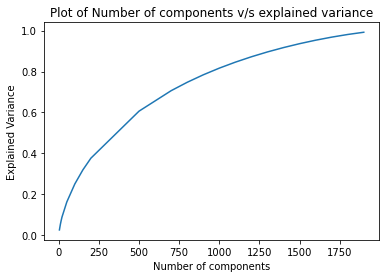

In [50]:
new_class_obj.truncate_svd_threshhold_plot(consecutive=False)


In [54]:
matrix_transformed, matrix_transformed_df = new_class_obj.truncate_svd(
    n_comp=1500, random_state=50, consecutive=False)

<class 'scipy.sparse.csr.csr_matrix'>
(10576, 1500)


In [56]:
y_kmeans, matrix_transformed_df = new_class_obj.kmeans_cluster(
    n_clusters=200,
    init='k-means++',
    random_state=50,
    n_comp=1500,
    consecutive=False)

<class 'scipy.sparse.csr.csr_matrix'>
(10576, 1500)
10576
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199}


In [58]:
new_df = new_class_obj.add_predicted_cluster_labels_to_df(
    n_clusters=200,
    init='k-means++',
    random_state=50,
    n_comp=1500,
    consecutive=False)

<class 'scipy.sparse.csr.csr_matrix'>
(10576, 1500)
